# -------------------------- Mushroom Classification ---------------------------

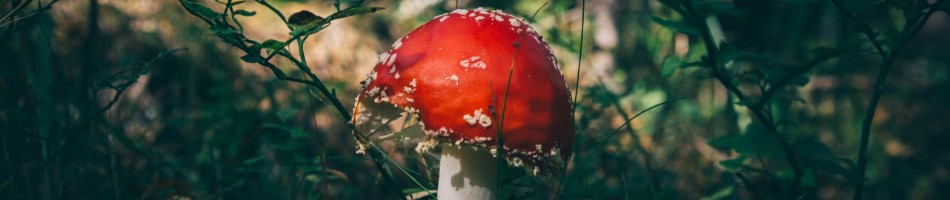

# importing libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import  GridSearchCV

# Loading data

In [87]:
dataset=pd.read_csv('C:/Users/VIET/Desktop/My project apps/Mushroom_project/mushroom_data/mushrooms.csv')

In [88]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [89]:
dataset.shape

(8124, 23)

In [90]:
#if we want to visualisate the 5 first lines
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [91]:
#if we want to visualisate the  last 5 lines in our data
dataset.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


Here we have two classes: "e" meaning "edible" and "p" meaning "poisonous."

# visualisation

"Split the classes into 'e' and 'p'."

In [92]:
df=dataset['class']

In [93]:
#count e and p
new_df= df.value_counts()
new_df

class
e    4208
p    3916
Name: count, dtype: int64

In [94]:
e= new_df[0]
p= new_df[1]

C:\Users\VIET\AppData\Local\Temp\ipykernel_6264\1796898813.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  e= new_df[0]
C:\Users\VIET\AppData\Local\Temp\ipykernel_6264\1796898813.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p= new_df[1]


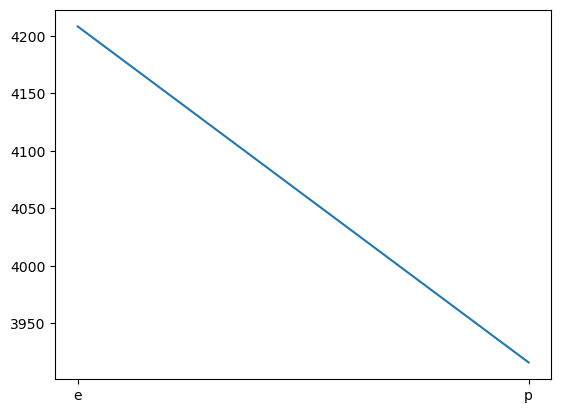

In [95]:
plt.plot(new_df)

Text(0.5, 0, 'Class')

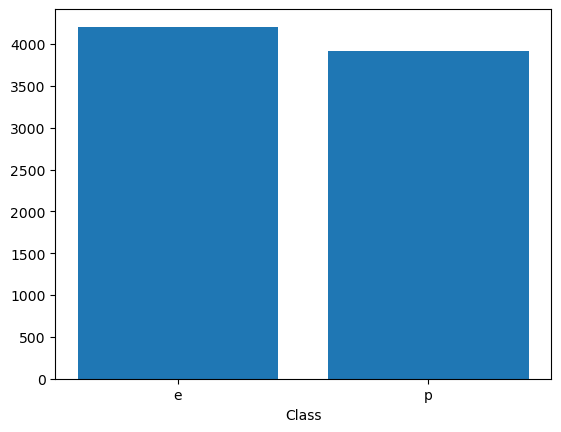

In [96]:
plt.bar(new_df.index,new_df.values)
plt.xlabel('Class')


In [97]:
#edible
class_e=dataset[dataset['class']=="e"]
class_e

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,v,l
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l


In [98]:
#poisonous
class_p=dataset[dataset['class']=='p']
class_p

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
13,p,x,y,w,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,v,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8114,p,f,y,c,f,m,a,c,b,y,...,y,c,c,p,w,n,n,w,c,d
8116,p,k,y,n,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
8117,p,k,s,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
8118,p,k,y,n,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d


<Axes: xlabel='cap-shape', ylabel='count'>

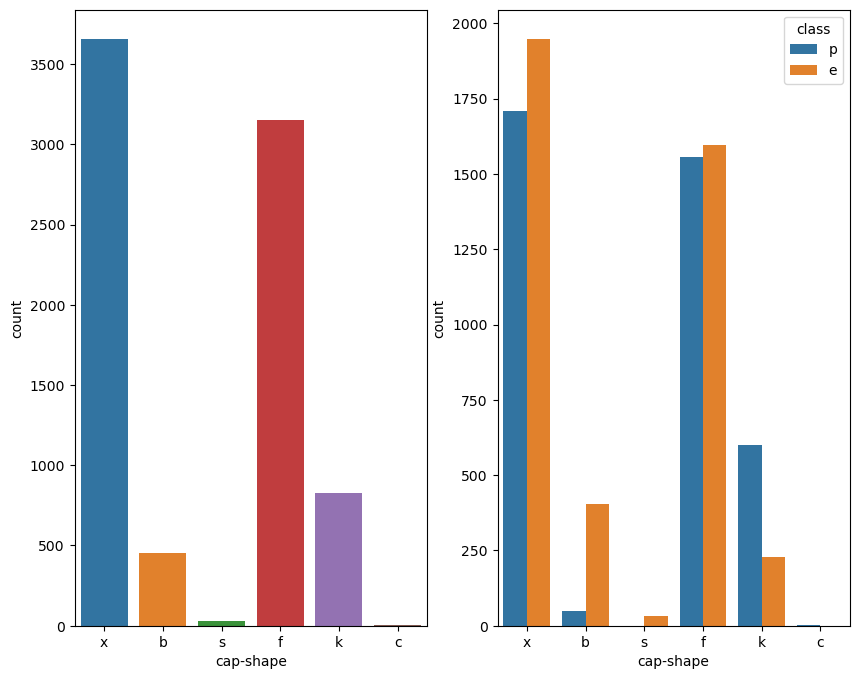

In [99]:
#here we want to visualisate the cap-shape of mushroom
plt.figure(figsize = [10, 8])
plt.subplot(1,2,1)
sns.countplot(x='cap-shape',data=dataset)
plt.subplot(1,2,2)
sns.countplot(x='cap-shape',hue ='class',data= dataset)

in cap-shape:

    b:bell
    c:conical
    x:convex
    f:flat
    k:knobbed
    s:sunken

<Axes: xlabel='cap-surface', ylabel='count'>

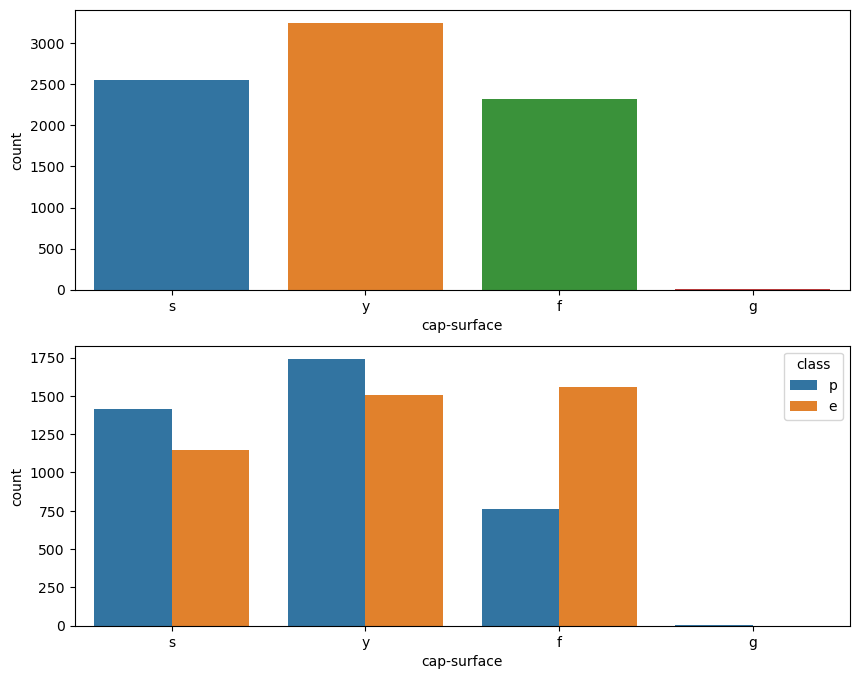

In [100]:
#here we want to visualisate the cap-surface of mushroom
plt.figure(figsize = [10, 8])
plt.subplot(2,1,1)
sns.countplot(x='cap-surface',data=dataset)
plt.subplot(2,1,2)
sns.countplot(x='cap-surface',hue = 'class',data= dataset)

in cap-surface:

    f:fibrous
    g:grooves
    y:scaly
    s:smooth

<Axes: xlabel='cap-color', ylabel='count'>

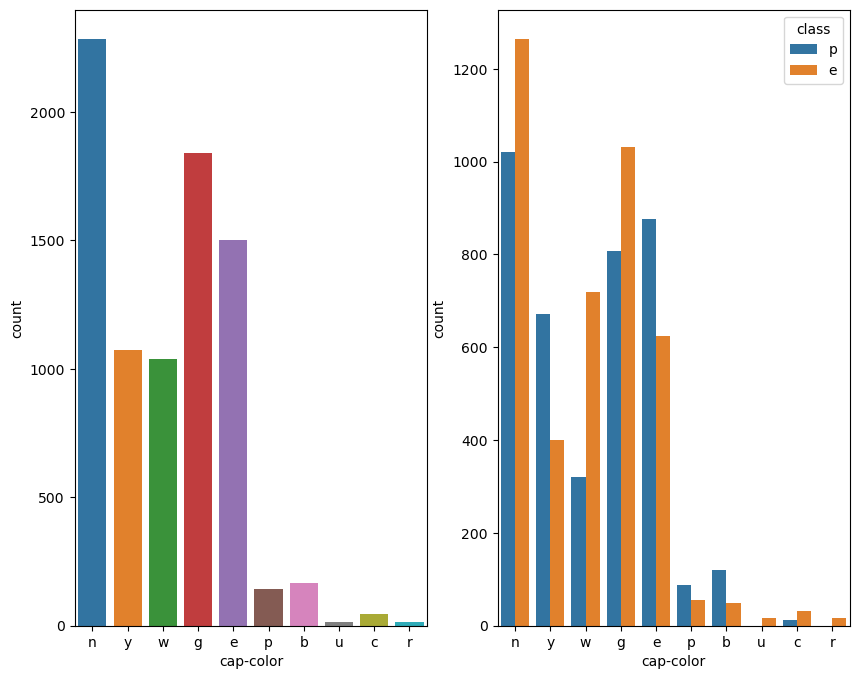

In [101]:
#here we want to visualisate the cap-color of mushroom
plt.figure(figsize = [10, 8])
plt.subplot(1,2,1)
sns.countplot(x='cap-color',data=dataset)
plt.subplot(1,2,2)
sns.countplot(x='cap-color',hue = 'class',data= dataset)

in cap-color:

    n:brown
    b:buff
    c:cinnamon
    g:gray
    r:green
    p:pink
    u:purple
    e:red
    w:white
    y:yellow
   

<Axes: xlabel='odor', ylabel='count'>

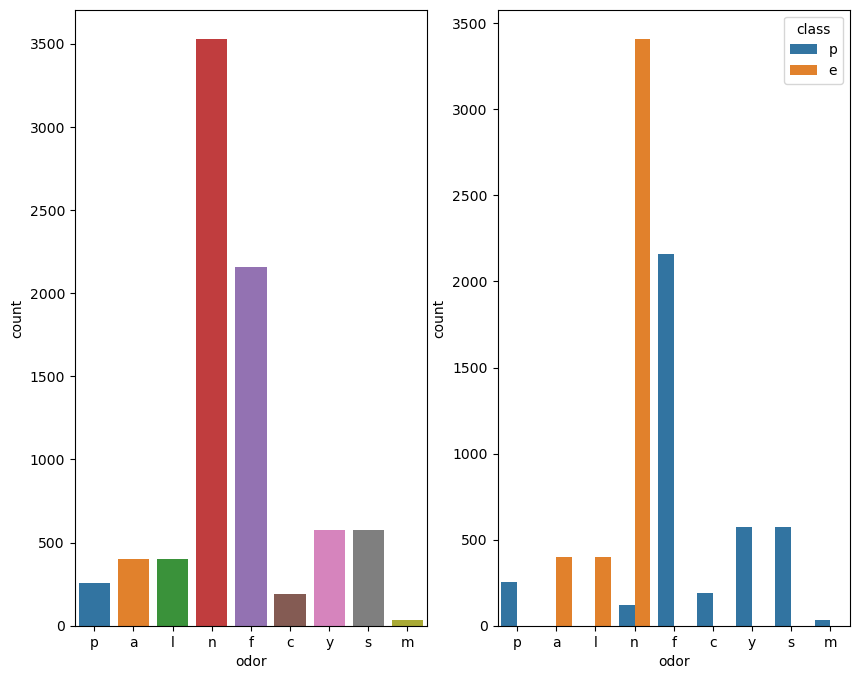

In [102]:
#here we want to visualisate the odor of mushroom
plt.figure(figsize = [10, 8])
plt.subplot(1,2,1)
sns.countplot(x='odor',data=dataset)
plt.subplot(1,2,2)
sns.countplot(x='odor',hue = 'class',data= dataset)

in odor:
   
    a:almond
    I:anise
    c:creosote
    y:fishy
    f:foul
    m:musty
    n:none
    p:pungent
    s:spicy

<Axes: xlabel='habitat', ylabel='count'>

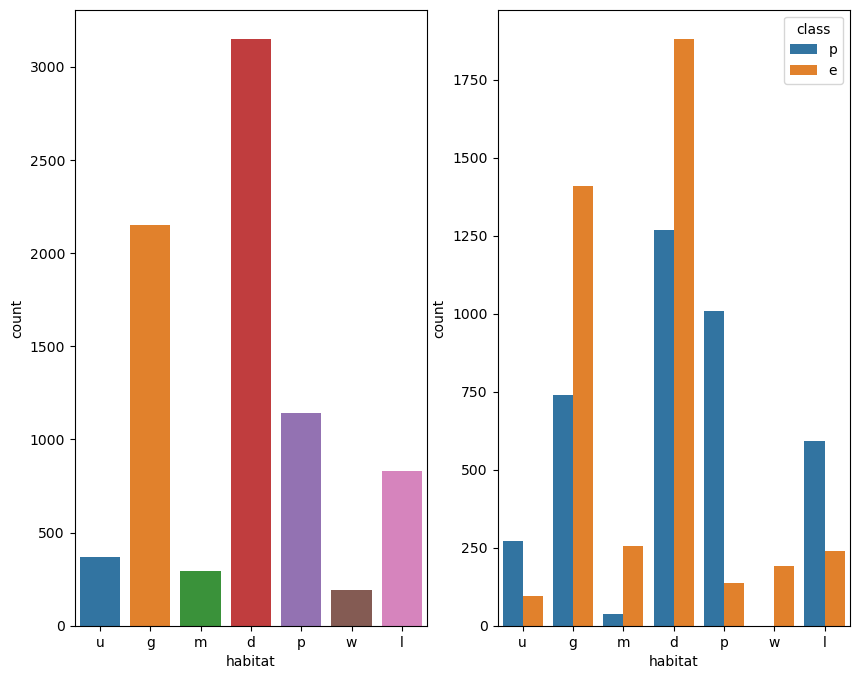

In [103]:
#here we want to visualisate the habitat
plt.figure(figsize = [10, 8])
plt.subplot(1,2,1)
sns.countplot(x='habitat',data=dataset)
plt.subplot(1,2,2)
sns.countplot(x='habitat',hue = 'class',data= dataset)

in habitat:

    g=grasses
    l=leaves
    m=meadows
    p=paths
    u=urban
    w=waste
    d=woods

# preprocessing data

The primary target of preprocessing data in machine learning is to enhance the quality of the input data to improve the performance and efficiency of machine learning models. Preprocessing aims to make the data more suitable for the algorithms being used by addressing various issues such as missing values, noisy data, scaling, normalization, feature engineering, and more. By preprocessing the data appropriately, machine learning models can better capture patterns and relationships within the data, leading to more accurate predictions and insights.

In [104]:
#show all columns of data
columns=dataset.columns
columns=pd.DataFrame(columns)
columns

,0
0,class
1,cap-shape
2,cap-surface
3,cap-color
4,bruises
5,odor
6,gill-attachment
7,gill-spacing
8,gill-size
9,gill-color


In [105]:
#check missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [106]:
#count missing values
dataset.isnull().sum().sort_values(ascending=False)

class                       0
stalk-surface-above-ring    0
population                  0
spore-print-color           0
ring-type                   0
ring-number                 0
veil-color                  0
veil-type                   0
stalk-color-below-ring      0
stalk-color-above-ring      0
stalk-surface-below-ring    0
stalk-root                  0
cap-shape                   0
stalk-shape                 0
gill-color                  0
gill-size                   0
gill-spacing                0
gill-attachment             0
odor                        0
bruises                     0
cap-color                   0
cap-surface                 0
habitat                     0
dtype: int64

In this dataset, "NaN" values are absent, but missing values are denoted by symbols such as "?". In this scenario, we employ the following function to handle these values:

<Axes: >

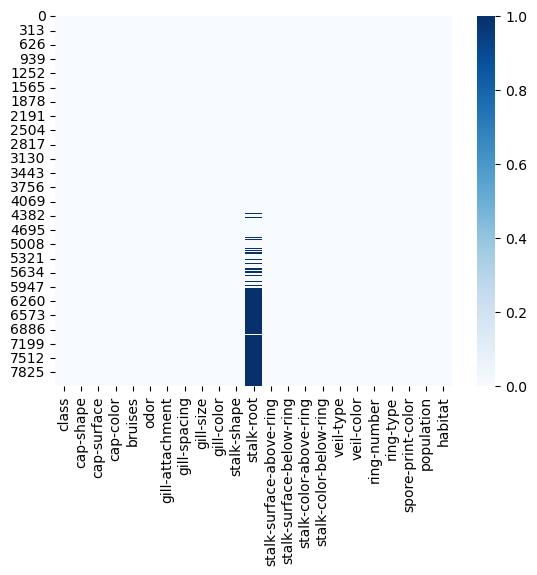

In [107]:
sns.heatmap(dataset.isin(["?","NaN"]), cmap='Blues')# if we have "NaN" or "?" values

As indicated in the dataset, there exists a substantial amount of missing data in the "stalk-root" column, indicating the necessity for its elimination.

In [108]:
dataset.drop("stalk-root",axis=1,inplace=True)

Also, when we check the unique values in the "veil_type" column, we find that only 'p' is present. Therefore, it can be removed.

In [109]:
dataset['veil-type'].unique()

array(['p'], dtype=object)

In [110]:
dataset.drop("veil-type",axis=1,inplace=True)
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [111]:
#after removing some columns
new_columns=dataset.columns
new_columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

Before training our data and applying the algorithm, we need to convert all variables to numeric values.

# Converting

In [112]:
features={}
for feature in new_columns:
    Q=dataset[feature].unique()
    Q.sort()
    l=[i+1 for i in range(len(Q))]
    features[feature]= {0:Q,1:l}  

In [113]:
features 

{'class': {0: array(['e', 'p'], dtype=object), 1: [1, 2]},
 'cap-shape': {0: array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object),
  1: [1, 2, 3, 4, 5, 6]},
 'cap-surface': {0: array(['f', 'g', 's', 'y'], dtype=object),
  1: [1, 2, 3, 4]},
 'cap-color': {0: array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object),
  1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
 'bruises': {0: array(['f', 't'], dtype=object), 1: [1, 2]},
 'odor': {0: array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object),
  1: [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'gill-attachment': {0: array(['a', 'f'], dtype=object), 1: [1, 2]},
 'gill-spacing': {0: array(['c', 'w'], dtype=object), 1: [1, 2]},
 'gill-size': {0: array(['b', 'n'], dtype=object), 1: [1, 2]},
 'gill-color': {0: array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
        dtype=object),
  1: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
 'stalk-shape': {0: array(['e', 't'], dtype=object), 1: [1, 2]},
 'stalk-surface-above-ring': {0: a

In [114]:
for column in new_columns:
    dataset[column].replace(features[column][0],features[column][1],inplace=True)

In [115]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,6,3,5,2,7,2,1,2,5,...,3,3,8,8,3,2,5,3,4,6
1,1,6,3,10,2,1,2,1,1,5,...,3,3,8,8,3,2,5,4,3,2
2,1,1,3,9,2,4,2,1,1,6,...,3,3,8,8,3,2,5,4,3,4
3,2,6,4,9,2,7,2,1,2,6,...,3,3,8,8,3,2,5,3,4,6
4,1,6,3,4,1,6,2,2,1,5,...,3,3,8,8,3,2,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,3,5,1,6,1,1,1,12,...,3,3,6,6,2,2,5,1,2,3
8120,1,6,3,5,1,6,1,1,1,12,...,3,3,6,6,1,2,5,1,5,3
8121,1,3,3,5,1,6,1,1,1,6,...,3,3,6,6,2,2,5,1,2,3
8122,2,4,4,5,1,9,2,1,2,1,...,3,2,8,8,3,2,1,8,5,3


# Data Splitting

In [116]:
#feauture
X=dataset.drop("class",axis='columns')
#target
Y=dataset["class"]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [119]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,6,3,5,2,7,2,1,2,5,1,3,3,8,8,3,2,5,3,4,6
1,6,3,10,2,1,2,1,1,5,1,3,3,8,8,3,2,5,4,3,2
2,1,3,9,2,4,2,1,1,6,1,3,3,8,8,3,2,5,4,3,4
3,6,4,9,2,7,2,1,2,6,1,3,3,8,8,3,2,5,3,4,6
4,6,3,4,1,6,2,2,1,5,2,3,3,8,8,3,2,1,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,5,1,6,1,1,1,12,1,3,3,6,6,2,2,5,1,2,3
8120,6,3,5,1,6,1,1,1,12,1,3,3,6,6,1,2,5,1,5,3
8121,3,3,5,1,6,1,1,1,6,1,3,3,6,6,2,2,5,1,2,3
8122,4,4,5,1,9,2,1,2,1,2,3,2,8,8,3,2,1,8,5,3


In [120]:
pd.DataFrame(Y)

,class
0,2
1,1
2,1
3,2
4,1
...,...
8119,1
8120,1
8121,1
8122,2


In [121]:
Y.value_counts()#2->poisonous and 1->edible

class
1    4208
2    3916
Name: count, dtype: int64

# Model Training

# Support Vector Machine

In [122]:
from sklearn.svm import SVC
svc=SVC()

In [123]:
#training
svc.fit(X_train,Y_train)

SVC()

# Model Evaluation

In [124]:
Y_predict_test= svc.predict(X_test)

In [125]:
Y_predict_test

array([2, 1, 1, ..., 1, 1, 1], dtype=int64)

In [126]:
#predict data
Y_predict_test[:40]

array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1], dtype=int64)

In [127]:
#actual data
Y_test.values[:40]

array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1], dtype=int64)

In [128]:
#calculating the score
svc.score(X_test,Y_test)

0.9872846595570139

<Axes: >

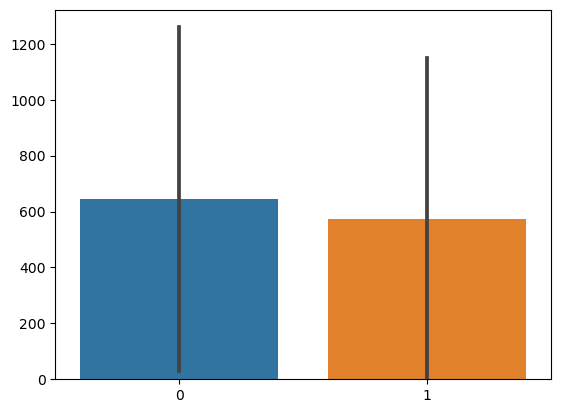

In [129]:
#confusion metrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix=confusion_matrix(Y_test,Y_predict_test)
sns.barplot(confusion_matrix)

<Axes: >

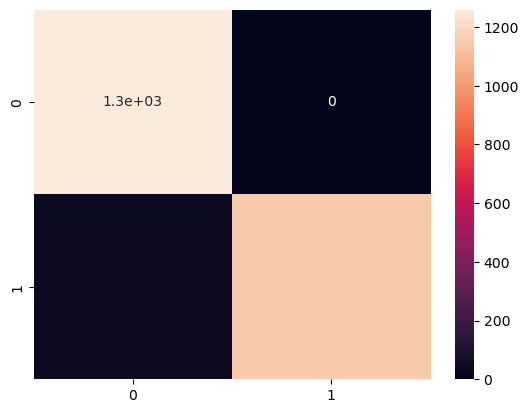

In [130]:
sns.heatmap(confusion_matrix, annot = True)

In [131]:
#classification_report
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1259
           2       1.00      0.97      0.99      1179

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [132]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict_test)
print("Accuracy:", accuracy)

Accuracy: 0.9872846595570139


# Cross Validation

In [133]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, X, Y, cv=kf)


In [134]:
print("Accuracy scores for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))

Accuracy scores for each fold: [0.99261538 0.99138462 0.98584615 0.98646154 0.99014778]
Mean Accuracy: 0.9892910951117848
Standard Deviation of Accuracy: 0.0026848334609567625


# K-Nearest Neighbors

In [135]:
from sklearn.neighbors import KNeighborsClassifier


In [136]:
knn= KNeighborsClassifier()

In [137]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [138]:
y_pred = knn.predict(X_test)

In [139]:
#predict data
y_pred[:40]

array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1], dtype=int64)

In [140]:
# classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1259
           2       1.00      1.00      1.00      1179

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [141]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9975389663658737


<Axes: >

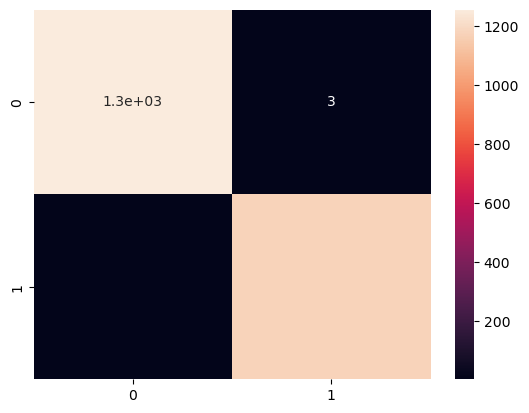

In [142]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot = True)

# Cross Validation

In [143]:
print("Accuracy scores for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))

Accuracy scores for each fold: [0.99261538 0.99138462 0.98584615 0.98646154 0.99014778]
Mean Accuracy: 0.9892910951117848
Standard Deviation of Accuracy: 0.0026848334609567625


# Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
log_reg = LogisticRegression()

In [146]:
log_reg.fit(X_train, Y_train)

C:\Users\VIET\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
y_pred = log_reg.predict(X_test)

In [148]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9524200164068909


<Axes: >

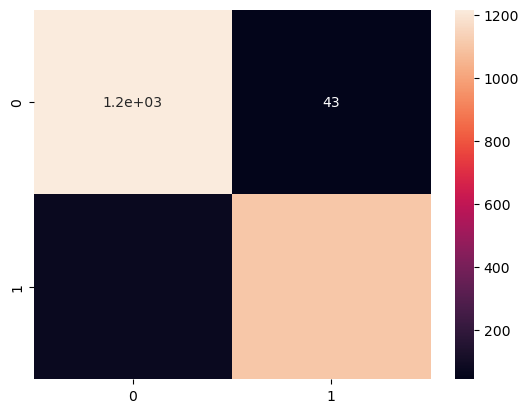

In [149]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
sns.heatmap(confusion_matrix, annot = True)

In [150]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_reg, X, Y, cv=kf)

C:\Users\VIET\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\VIET\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [151]:
print("Accuracy scores for each fold:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Standard Deviation of Accuracy:", np.std(scores))

Accuracy scores for each fold: [0.944      0.95323077 0.94830769 0.94276923 0.94519704]
Mean Accuracy: 0.9467009473285335
Standard Deviation of Accuracy: 0.0037479444844130162


# Correlation

In [152]:
correlation_matrix=dataset.corr()

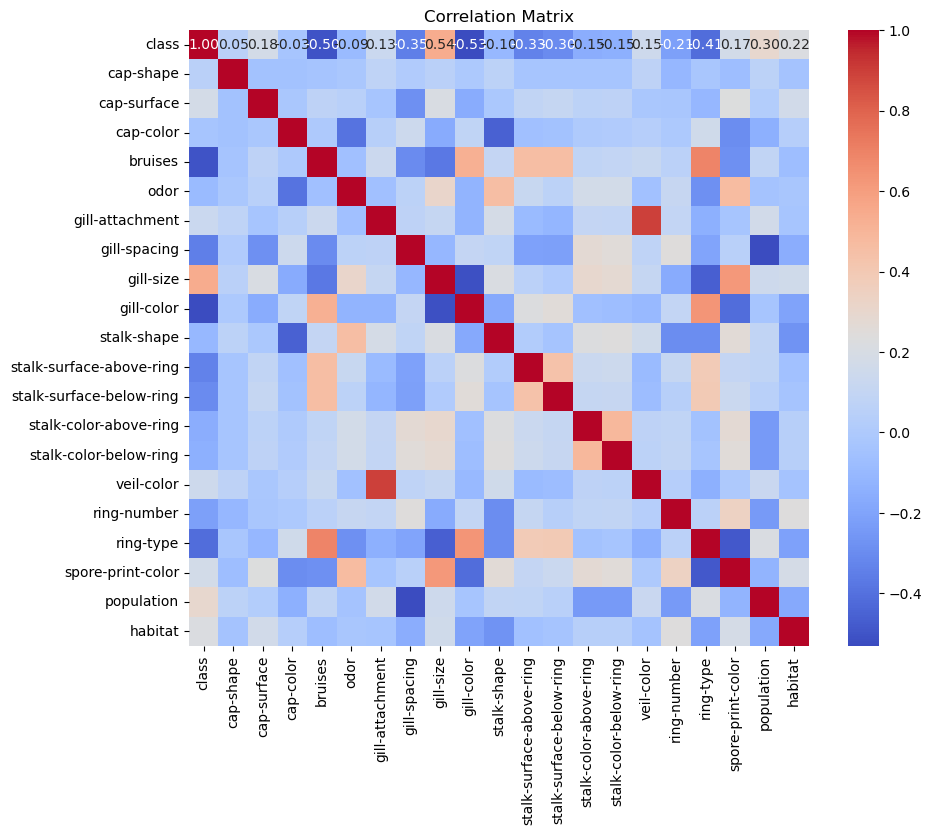

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Après avoir réalisé une analyse de corrélation , j'ai identifié cinq colonnes clés dans mon jeu de données qui présentaient des relations significatives avec la variable cible(target). Ces colonnes ont été soigneusement sélectionnées en fonction de leurs coefficients de corrélation, qui indiquaient leur impact potentiel sur la précision de prédiction du modèle. En réduisant les fonctionnalités à ces cinq colonnes, j'ai cherché à rationaliser les paramètres utilisés dans mon application web, améliorant ainsi son efficacité et réduisant sa complexité computationnelle. Ce processus de sélection de fonctionnalités stratégique a non seulement optimisé les performances du modèle d'apprentissage automatique, mais a également contribué à une expérience utilisateur plus ciblée et rationalisée dans l'application web, en veillant à ce que seules les fonctionnalités les plus pertinentes soient utilisées à des fins de prédiction.

In [154]:
#New X (features) for a new fit to create the web application.
new_X = X[['bruises','gill-spacing','gill-size','gill-color','ring-type']]

In [155]:
from sklearn.model_selection import StratifiedShuffleSplit

In [156]:
new_data=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train,test in new_data.split(new_X,Y):
    X_train,X_test=new_X.iloc[train],new_X.iloc[test]
    Y_train,Y_test=Y.iloc[train],Y.iloc[test]

# SVM

In [157]:
Classifier=SVC()
Classifier.fit(new_X,Y)

SVC()

In [158]:
Y_predict_test= Classifier.predict(X_test)

In [159]:
accuracy = accuracy_score(Y_test, Y_predict_test)
print("Accuracy:", accuracy)

Accuracy: 0.9286300246103364


# KNN

In [160]:
knn= KNeighborsClassifier(metric='euclidean')

In [161]:
knn.fit(new_X,Y)

KNeighborsClassifier(metric='euclidean')

In [162]:
Y_predict_test= knn.predict(X_test)

In [163]:
accuracy = accuracy_score(Y_test, Y_predict_test)
print("Accuracy:", accuracy)

Accuracy: 0.961033634126333


# Saving the Model

In [164]:
#pour enregistrer le modéle
pickle.dump(Classifier,open('model.pkl','wb'))